# Fashion MNIST 데이터 다운로드

In [1]:
BATCH_SIZE = 64

In [2]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

trainset = datasets.FashionMNIST(
    root      = '~/.data/',
    train     = True,
    download  = True,
    transform = transform
)

testset = datasets.FashionMNIST(
    root      = '~/.data/',
    train     = False,
    download  = True,
    transform = transform
)

train_loader = torch.utils.data.DataLoader(
    dataset    = trainset,
    batch_size = BATCH_SIZE,
    shuffle    = True
)

test_loader = torch.utils.data.DataLoader(
    dataset    = testset,
    batch_size = BATCH_SIZE,
    shuffle    =True
)

training_dataiter = iter(train_loader)
training_images, training_labels = next(training_dataiter)

test_dataiter = iter(test_loader)
test_images, test_labels = next(test_dataiter)

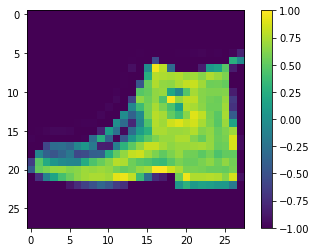

In [3]:
import matplotlib.pyplot as plt

# 이미지 샘플 모습 확인하기 28 x 28 x 1 (Grey: 0~255)

plt.figure()
plt.imshow(training_images[0].squeeze().numpy())
plt.colorbar()
plt.grid(False)

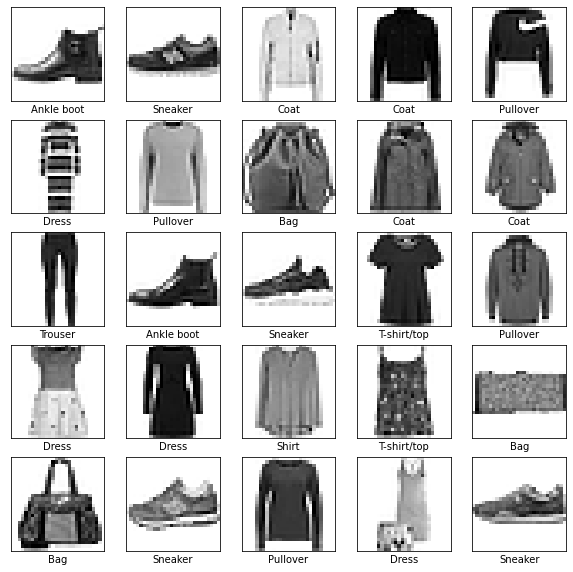

In [4]:
# 10개의 클래스 명칭 지정

CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


# 각 클래스별 샘플 이미지 확인

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(training_images[i].squeeze().numpy(), cmap=plt.cm.binary)
    plt.xlabel(CLASSES[training_labels[i].item()])

In [5]:
# 학습용 6만개, 테스트용 1만개, 이미지 사이즈 28x28

print(type(trainset))

print (f"Training data: {len(trainset)}, {training_images.shape}")
print (f"Test data: {len(testset)}, {test_images.shape}")

<class 'torchvision.datasets.mnist.FashionMNIST'>
Training data: 60000, torch.Size([64, 1, 28, 28])
Test data: 10000, torch.Size([64, 1, 28, 28])


In [6]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)

In [7]:
from torchsummary import summary

summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
        LogSoftmax-5                   [-1, 10]               0
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


In [8]:
n_epochs = 5
n_batches = len(train_loader)

optimizer = torch.optim.Adam(model.parameters())
cost_fxn = nn.CrossEntropyLoss()

def accuracy_pct(pred_y, true_y):
  _, prediction = torch.max(pred_y, 1)
  correct = (prediction == true_y).sum().item()
  return (correct / true_y.shape[0]) * 100.0


for epoch in range(n_epochs):
  
  avg_cost = 0.0
  avg_accuracy = 0.0
  
  for i, (X, y) in enumerate(train_loader):
    
    # forward propagation:
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    cost = cost_fxn(y_hat, y)
    avg_cost += cost / n_batches
    
    # backprop and optimization via gradient descent: 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # calculate accuracy metric:
    accuracy = accuracy_pct(y_hat, y)
    avg_accuracy += accuracy / n_batches
    
    # if (i + 1) % 100 == 0:
    #   print('Step {}'.format(i + 1))
    
  print(f"Epoch {epoch + 1}/{n_epochs} complete: Cost: {avg_cost:.3f}, Accuracy: {avg_accuracy:.1f}% \n")

print('Training complete.')

Epoch 1/5 complete: Cost: 0.499, Accuracy: 82.1% 

Epoch 2/5 complete: Cost: 0.383, Accuracy: 86.1% 

Epoch 3/5 complete: Cost: 0.346, Accuracy: 87.3% 

Epoch 4/5 complete: Cost: 0.318, Accuracy: 88.3% 

Epoch 5/5 complete: Cost: 0.302, Accuracy: 88.9% 

Training complete.


In [9]:
n_test_batches = len(test_loader)

model.eval()

with torch.no_grad():
  
  avg_test_cost = 0.0
  avg_test_acc = 0.0
  
  for X, y in test_loader:
    
    # make predictions: 
    X_flat = X.view(X.shape[0], -1)
    y_hat = model(X_flat)
    
    # calculate cost: 
    cost = cost_fxn(y_hat, y)
    avg_test_cost += cost / n_test_batches
    
    # calculate accuracy:
    test_accuracy = accuracy_pct(y_hat, y)
    avg_test_acc += test_accuracy / n_test_batches

print('Test cost: {:.3f}, Test accuracy: {:.1f}%'.format(avg_test_cost, avg_test_acc))

Test cost: 0.362, Test accuracy: 87.0%
